In [116]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import datetime

In [117]:
weather_summary = pd.read_csv('monthly_weather_averages.csv')
flight_summary = pd.read_csv('Summary Flight Tables/monthly_summary.csv')

In [118]:
weather_summary = weather_summary.drop(columns=["Unnamed: 0"])

In [119]:
flight_summary = flight_summary.drop(columns=["Unnamed: 0"])

In [120]:
weather = weather_summary.set_index('Date', inplace=True)
weather = weather_summary.index = pd.to_datetime(weather_summary.index)
weather_summary

,Latitude,Longitude,Max Temp,Precip,Wind Speed,Airport
Date,,,,,,
2015-01-31,32.896,-97.037,53.941935,0.116129,16.906452,DFW
2015-02-28,32.896,-97.037,55.828571,0.107143,19.442857,DFW
2015-03-31,32.896,-97.037,64.629032,0.082258,15.983871,DFW
2015-04-30,32.896,-97.037,74.166667,0.185000,18.783333,DFW
2015-05-31,32.896,-97.037,78.296774,0.548710,19.332258,DFW
...,...,...,...,...,...,...
2018-08-31,41.979,-87.904,83.903226,0.218387,15.654839,ORD
2018-09-30,41.979,-87.904,77.060000,0.121333,14.876667,ORD
2018-10-31,41.979,-87.904,60.409677,0.154839,15.445161,ORD


In [121]:
monthly_mean = weather_summary.resample("M").mean()

In [122]:
monthly_mean

,Latitude,Longitude,Max Temp,Precip,Wind Speed
Date,,,,,
2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290
2015-02-28,36.463,-98.4886,48.344286,0.098429,17.013571
2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774
2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000
2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097
2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667
2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065
2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968
2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667


In [123]:
flight_summary["Date"] = flight_summary["Date"].astype('datetime64[ns]')
flight_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     48 non-null     datetime64[ns]
 1   # Cancelled Flights      48 non-null     int64         
 2   # Non-Cancelled Flights  48 non-null     int64         
 3   Total Flights            48 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.6 KB


In [124]:
combined = pd.merge(monthly_mean, flight_summary, on="Date")
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400
1,2015-02-28,36.463,-98.4886,48.344286,0.098429,17.013571,4296,96062,100358
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917


In [125]:
combined = combined.drop(1)
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917
10,2015-11-30,36.463,-98.4886,61.538667,0.163133,16.866000,836,108694,109530


In [126]:
combined["Month"] = combined["Date"].dt.month_name()
combined["Year"] = combined["Date"].dt.year
combined["Year"] = combined ["Year"].astype('object')
combined.head()

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights,Month,Year
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400,January,2015
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057,March,2015
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350,April,2015
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985,May,2015
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623,June,2015


In [127]:
combined["X Label"] = combined["Month"].astype(str) + " " + combined["Year"].astype(str)
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights,Month,Year,X Label
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400,January,2015,January 2015
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057,March,2015,March 2015
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350,April,2015,April 2015
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985,May,2015,May 2015
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623,June,2015,June 2015
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471,July,2015,July 2015
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540,August,2015,August 2015
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429,September,2015,September 2015
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917,October,2015,October 2015
10,2015-11-30,36.463,-98.4886,61.538667,0.163133,16.866000,836,108694,109530,November,2015,November 2015


### Scatterplots

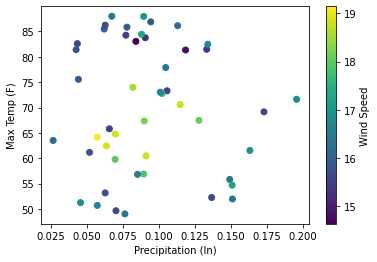

In [145]:
#Temp vs Precipitation For Cancelled Flights 
plt.scatter(combined['Precip'],combined['Max Temp'],c=combined['Wind Speed'])
clb = plt.colorbar()
plt.xlabel("Precipitation (In)")
plt.ylabel("Max Temp (F)")
clb.set_label("Wind Speed")
plt.show()

In [131]:
#Correlation
precip = combined.iloc[:,4]
max_temp = combined.iloc[:,3]
correlation = st.pearsonr(precip,max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.05


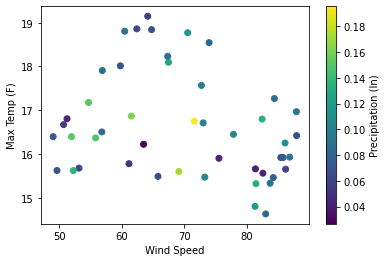

In [132]:
#Temp vs Wind Speed For Cancelled Flights 
plt.scatter(combined['Max Temp'],combined['Wind Speed'],c=combined['Precip'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Max Temp (F)")
clb.set_label("Precipitation (In)")
plt.show()

In [142]:
#Correlation
wind_speed = combined.iloc[:,5]
max_temp = combined.iloc[:,3]
correlation = st.pearsonr(wind_speed,max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.28


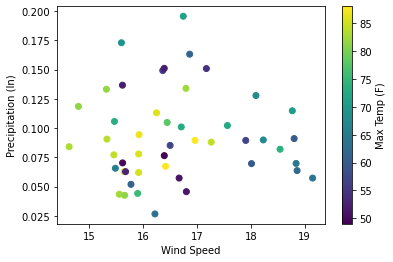

In [143]:
#Wind speed vs precipitation &  temp as colored data points for cancelled flights 
plt.scatter(combined['Wind Speed'],combined['Precip'],c=combined['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Precipitation (In)")
clb.set_label("Max Temp (F)")
plt.show()

In [137]:
#Correlation
wind_speed = combined.iloc[:,5]
precip = combined.iloc[:,4]
correlation = st.pearsonr(wind_speed,precip)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.0


In [138]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(wind_speed, precip)
pe_fit = pe_slope * wind_speed + pe_int

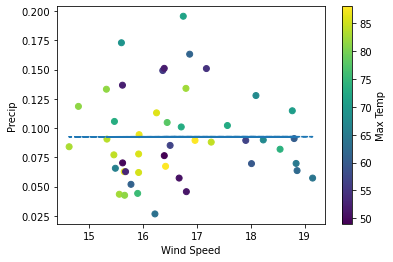

In [139]:
plt.scatter(combined['Wind Speed'],combined['Precip'],c=combined['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Precip")
clb.set_label("Max Temp")
plt.plot(wind_speed,pe_fit,"--")
plt.show()

### Bar Charts

ValueError: The lengths of the data (7) and the error 6 do not match

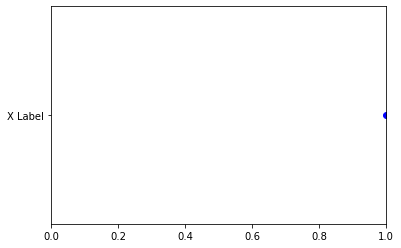

In [146]:
#Precipitation and months for cancellations
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(combined), 1)+1, 'X Label', yerr='Precip', fmt="o", color="b")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Months")
ax.set_ylabel("Preciptation (Ins)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [144]:
monthly_precip = combined.plot(kind="bar", title="Average Precipitation by Month for Cancellations")
monthly_precip.set_xlabel("Month")
monthly_precip.set_ylabel("Avg. Precip (In)")

plt.show()
plt.tight_layout()

ValueError: view limit minimum -36956.36303 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

### Mi

In [9]:
# summary2015 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2015.csv', index_col=0)
# summary2016 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2016.csv', index_col=0)
# summary2017 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2017.csv', index_col=0)
# summary2018 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2018.csv', index_col=0)

# summary1 = summary2015.append(summary2016)
# summary2 = summary1.append(summary2017)
# summary = summary2.append(summary2018)

# total_flights = summary.reset_index()

In [10]:
# #All Flights
# total_flights

,Date,Origin,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0
1,2015-01-01,ORD,OAK,1534,1819,1836.0,0
2,2015-01-01,LAX,IAH,1648,2155,1379.0,0
3,2015-01-01,ORD,ATL,1105,1355,606.0,0
4,2015-01-01,ORD,GRB,1310,1358,173.0,0
...,...,...,...,...,...,...,...
5324042,2018-12-31,LAX,IAH,720,1235,1379.0,0
5324043,2018-12-31,ORD,PHL,2035,2331,678.0,0
5324044,2018-12-31,LAX,PHL,720,1522,2402.0,0
5324045,2018-12-31,DFW,MCI,1725,1856,460.0,0


In [11]:
# flight_summary = pd.read_csv('Summary Flight Tables/airport_summary.csv', index_col=0)
# monthly_summary = pd.read_csv('Summary Flight Tables/monthly_summary.csv', index_col=0)
# weather_summary = pd.read_csv('airport_weather_data_result.csv', index_col=0)

In [12]:
# #Cancelled and Non-Cancelled Flights by Airport
# flight_summary

,Airport,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,DFW,10181,900961,911142
1,ATL,7701,1505703,1513404
2,DEN,5989,891080,897069
3,LAX,2372,853024,855396
4,ORD,13418,1133618,1147036


In [13]:
# #Total Cancelled and Non-Cancelled Flights
# monthly_summary

,Date,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,1250,108150,109400
1,2015-02-28,4296,96062,100358
2,2015-03-31,1759,116298,118057
3,2015-04-30,585,112765,113350
4,2015-05-31,919,116066,116985
5,2015-06-30,886,117737,118623
6,2015-07-31,243,122228,122471
7,2015-08-31,355,121185,121540
8,2015-09-30,187,112242,112429
9,2015-10-31,371,116546,116917


In [14]:
# #Total Weather Summary
# weather_summary

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1
...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2


In [43]:
# weather_summary['Date'] = pd.to_datetime(weather_summary['Date'])

In [44]:
# weather_summary.dtypes

Date           datetime64[ns]
Airport                object
Latitude              float64
Longitude             float64
Max Temp              float64
Precip                float64
Precip Type            object
Wind Speed            float64
month_name             object
dtype: object

In [106]:
# weather_summary

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month Name
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4,January
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7,January
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7,January
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1,January
...,...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8,December
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0,December
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2,December
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2,December


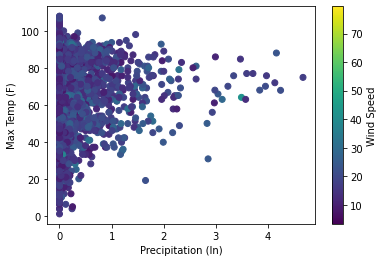

In [66]:
# #Temp vs precipitation & for cancelled flights 
# plt.scatter(weather_summary['Precip'],weather_summary['Max Temp'],c=weather_summary['Wind Speed'])
# clb = plt.colorbar()
# plt.xlabel("Precipitation (In)")
# plt.ylabel("Max Temp (F)")
# clb.set_label("Wind Speed")
# plt.show()

In [20]:
# #Correlation
# precip = weather_summary.iloc[:,5]
# max_temp = weather_summary.iloc[:,4]
# correlation = st.pearsonr(precip,max_temp)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.03


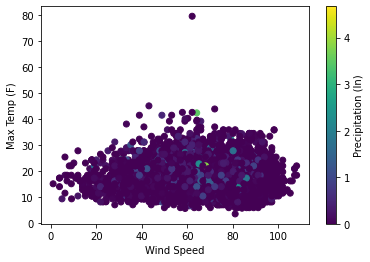

In [65]:
# #Temp vs Wind Speed & for cancelled flights 
# plt.scatter(weather_summary['Max Temp'],weather_summary['Wind Speed'],c=weather_summary['Precip'])
# clb = plt.colorbar()
# plt.xlabel("Wind Speed")
# plt.ylabel("Max Temp (F)")
# clb.set_label("Precipitation (In)")
# plt.show()

In [22]:
# #Correlation
# wind_speed = weather_summary.iloc[:,7]
# max_temp = weather_summary.iloc[:,4]
# correlation = st.pearsonr(wind_speed,max_temp)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.07


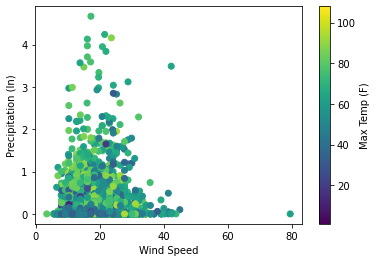

In [64]:
# #Wind speed vs precipitation &  temp as colored data points for cancelled flights 
# plt.scatter(weather_summary['Wind Speed'],weather_summary['Precip'],c=weather_summary['Max Temp'])
# clb = plt.colorbar()
# plt.xlabel("Wind Speed")
# plt.ylabel("Precipitation (In)")
# clb.set_label("Max Temp (F)")
# plt.show()

In [24]:
# #Correlation
# wind_speed = weather_summary.iloc[:,7]
# precip = weather_summary.iloc[:,5]
# correlation = st.pearsonr(wind_speed,precip)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


In [25]:
# pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(wind_speed, precip)
# pe_fit = pe_slope * wind_speed + pe_int

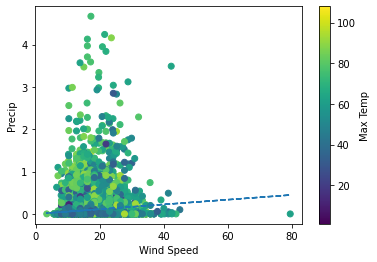

In [26]:
# plt.scatter(weather_summary['Wind Speed'],weather_summary['Precip'],c=weather_summary['Max Temp'])
# clb = plt.colorbar()
# plt.xlabel("Wind Speed")
# plt.ylabel("Precip")
# clb.set_label("Max Temp")
# plt.plot(wind_speed,pe_fit,"--")
# plt.show()

In [27]:
#summary_date = weather_summary.set_index('Date', inplace=True)
#summary_date = weather_summary.index = pd.to_datetime(weather_summary.index)
#weather_summary

In [76]:
# weather_summary.dtypes

Date           datetime64[ns]
Airport                object
Latitude              float64
Longitude             float64
Max Temp              float64
Precip                float64
Precip Type            object
Wind Speed            float64
month_name             object
dtype: object

In [107]:
# weather_summary['Month Name'] = weather_summary['Date'].dt.month_name()
# weather_summary

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month Name
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4,January
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7,January
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7,January
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1,January
...,...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8,December
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0,December
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2,December
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2,December


In [108]:
# monthly_weather = weather_summary[['Date','Month Name', 'Airport', 'Latitude', 'Longitude', 'Max Temp', 'Precip', 'Precip Type','Wind Speed']]
# monthly_weather.head()

,Date,Month Name,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,January,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-02,January,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4
2,2015-01-03,January,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7
3,2015-01-04,January,DFW,32.896,-97.037,43.1,0.00,NaN,27.7
4,2015-01-05,January,DFW,32.896,-97.037,46.1,0.00,NaN,16.1


In [110]:
# max_temp_average = monthly_weather.groupby('Month Name')['Max Temp'].mean()
# max_temp_average

Month Name
April        67.548500
August       85.485806
December     52.995161
February     54.949735
January      50.480000
July         87.069839
June         83.158500
March        62.058710
May          74.060484
November     61.920333
October      72.758226
September    82.088833
Name: Max Temp, dtype: float64

In [111]:
# precip_average = monthly_weather.groupby('Month Name')['Precip'].mean()
# precip_average

Month Name
April        0.100567
August       0.086065
December     0.101468
February     0.101982
January      0.085855
July         0.078323
June         0.108067
March        0.065984
May          0.121113
November     0.085167
October      0.105935
September    0.072167
Name: Precip, dtype: float64

In [112]:
# wind_speed_average = monthly_weather.groupby('Month Name')['Wind Speed'].mean()
# wind_speed_average

Month Name
April        18.485000
August       15.787742
December     16.082903
February     17.530973
January      16.303710
July         16.307258
June         16.210667
March        18.147258
May          17.326452
November     16.269333
October      15.919839
September    15.162167
Name: Wind Speed, dtype: float64

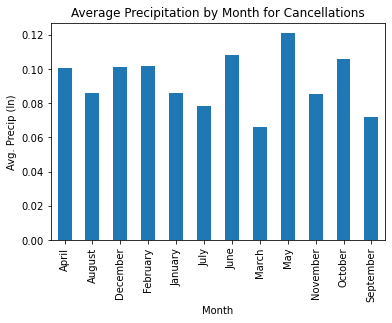

<Figure size 432x288 with 0 Axes>

In [113]:
monthly_precip = precip_average.plot(kind="bar", title="Average Precipitation by Month for Cancellations")
monthly_precip.set_xlabel("Month")
monthly_precip.set_ylabel("Avg. Precip (In)")

plt.show()
plt.tight_layout()

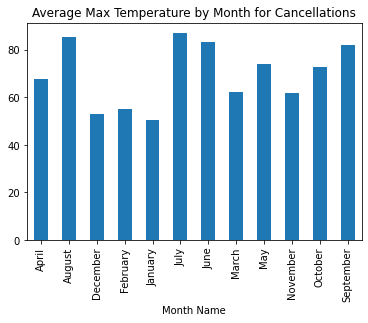

<Figure size 432x288 with 0 Axes>

In [114]:
monthly_temp = max_temp_average.plot(kind="bar", title="Average Max Temperature by Month for Cancellations")
monthly_precip.set_xlabel('Month')
monthly_precip.set_ylabel('Avg. Max Temp (F)')

plt.show()
plt.tight_layout()

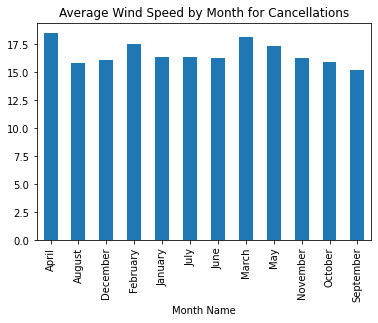

<Figure size 432x288 with 0 Axes>

In [115]:
monthly_wind_speed = wind_speed_average.plot(kind="bar", title="Average Wind Speed by Month for Cancellations")
monthly_precip.set_xlabel("Month")
monthly_precip.set_ylabel("Wind Speed")

plt.show()
plt.tight_layout()

In [ ]:
# Calculate means
means = monthly_weather['Precip'].mean()
# Calculate standard error on means
sems = monthly_weather['Precip'].sem()

In [ ]:
#Precipitation and months for cancellations
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(monthly_weather), 1)+1, means, yerr=sems, fmt="o", color="b")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Months")
ax.set_ylabel("Preciptation (Ins)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()